In [14]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from experiments import *
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from tflearn.data_utils import to_categorical, pad_sequences
from experiments import *
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
style.use('seaborn-whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
minlen = 3

In [3]:
model_id = "predict_next_prob_binary_two_layer_minlen_{}".format(minlen)
hidden_reps = None
graph_to_use = tf.Graph()
with graph_to_use.as_default():
    hidden_rep_model = load_model(model_id, load_checkpoint=True, is_training=False, get_hidden_rep=True)
    x, y, student_ids = load_data_will_student_solve_next_problem(hoc_num=18, minlen=minlen, return_student_ids=True)
    x_train, x_test, y_train, y_test, student_ids_train, student_ids_test = train_test_split(x, y, student_ids, test_size=0.1, random_state=42)
    hidden_reps = np.array(hidden_rep_model.predict(x_test))
y_test = np.argmax(y_test, axis=1)

Loading model...


../tensorboard_logs/predict_next_prob_binary_two_layer_minlen_3/
../checkpoints/predict_next_prob_binary_two_layer_minlen_3/
../best_checkpoints/predict_next_prob_binary_two_layer_minlen_3/
../checkpoints/predict_next_prob_binary_two_layer_minlen_3/-6448
Checkpoint loaded.
Model loaded.
Loading data...
Data loaded.


ValueError: axis(=1) out of bounds

In [6]:
print hidden_reps.shape
np.save(open('hidden_reps.npy', 'wb+'), hidden_reps)

(6367, 32)


In [8]:
tsne_model = TSNE(n_components=2, random_state=0)

In [9]:
tsne_results = tsne_model.fit_transform(hidden_reps)

In [11]:
print tsne_results.shape

(6367, 2)


In [29]:
dim_0 = np.reshape(tsne_results[:,0], tsne_results.shape[0])
dim_1 = np.reshape(tsne_results[:,1], tsne_results.shape[0])

In [17]:
print y_test.shape

(6367, 2)


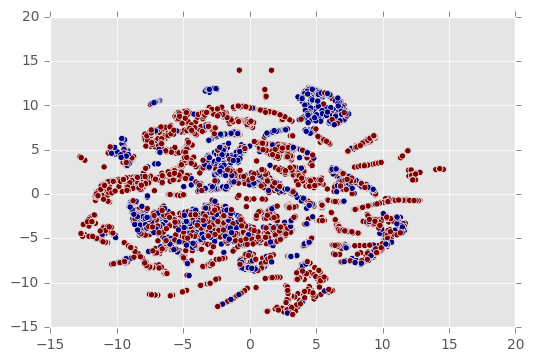

In [30]:
plt.scatter(dim_0, dim_1, c=y_test)

In [24]:
success_indices = np.argwhere(y_test == np.amax(y_test))
success_indices = np.array(success_indices.flatten().tolist() )

In [25]:
fail_indices = np.argwhere(y_test == np.amin(y_test))
fail_indices = np.array(fail_indices.flatten().tolist() )

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca_result = pca.fit_transform(hidden_reps)

In [37]:
tsne_results = tsne_model.fit_transform(pca_result)

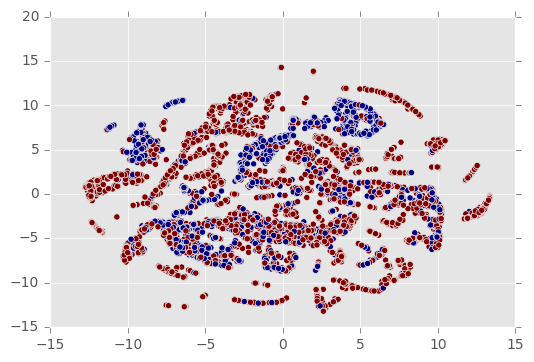

In [38]:
dim_0 = np.reshape(tsne_results[:,0], tsne_results.shape[0])
dim_1 = np.reshape(tsne_results[:,1], tsne_results.shape[0])
plt.scatter(dim_0, dim_1, c=y_test)

In [43]:
print student_ids_test.shape

(6367,)


In [47]:
cluster_indices = np.where(np.logical_and(tsne_results[:,0] <= -10, tsne_results[:,1] <=4))

In [48]:
print student_ids_test[cluster_indices]

[454361 372330 329259  97031 288564 490331  89451 541098 338511 136253
 619849 289275 142634  66682  20520 440464 643998 577736 502998 156694
 583142 158543 621481 410492 377761 240651 544139 286158 398795 370092
 428019 130165 197319 304572 509665  85251 235511 131345 148598 257808
 512776 270782 466795  33913 617845 517782 271511 429383 385203 205110
 581540 367186 377714 170543 272439 614722 297323 416386 204872  62680
 145561  17206  11095 371200  29376 245198 516250 274589 183754 228227
 397824 634267 580466 253216  56404 128730 264089 295158 357196 571758
 554661 525770 120965 521209 312760 324466 604149 317393 532393 406998
 286418 364058 135046 209001 579460 375743 101443 588458 222220 623379
 177361 257625  50296  44165 331266 587264 266618 235124 392378 203575
 454066 630085 293947   4084 163224 520918 127033  22476 512939 202453
 329167 449217 585936 310179  49791 504361 177393 192189 424643 159932
 197344  85761 403519 479663 226639 468636 431319 530731  55516 576613
 48306

In [51]:
tsne_results_cluster = tsne_results[cluster_indices]
print tsne_results_cluster.shape

(278, 2)


In [53]:
dim_0 = np.reshape(tsne_results_cluster[:,0], tsne_results_cluster.shape[0])
dim_1 = np.reshape(tsne_results_cluster[:,1], tsne_results_cluster.shape[0])
print y_test[cluster_indices].shape

(278, 2)


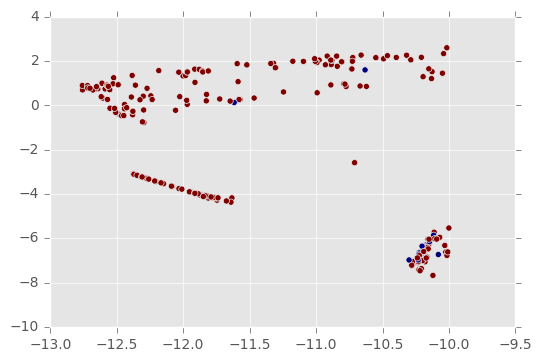

In [55]:
plt.scatter(dim_0, dim_1, c=y_test[cluster_indices])

In [56]:
student_to_traj_map = get_student_to_traj_map(18)

In [57]:
traj_cluster = []
for s in student_ids_test[cluster_indices]:
    traj_cluster.append(student_to_traj_map[s])

In [58]:
print traj_cluster

[73, 423, 9532, 48501, 79966, 545, 82673, 66192, 31385, 49841, 334, 11545, 52886, 53, 33857, 70458, 189, 34088, 592, 57900, 1524, 8736, 73, 65924, 2426, 53, 814, 42785, 1551, 59631, 13269, 657, 3415, 798, 57516, 53, 758, 15866, 76784, 50844, 1040, 66136, 9324, 49659, 17705, 16872, 32040, 73, 41314, 4626, 172, 189, 78081, 54001, 2701, 53, 983, 12027, 316, 3153, 53, 6488, 53, 57424, 5098, 68127, 233, 40946, 79839, 189, 23675, 43669, 44038, 46982, 43559, 1851, 48009, 4619, 792, 16336, 30656, 59949, 31425, 172, 4231, 49782, 168, 11485, 53, 33287, 316, 637, 69850, 181, 328, 48608, 30166, 14729, 32121, 59916, 1094, 15713, 49259, 8485, 19996, 3149, 37110, 3456, 316, 63297, 75386, 23428, 47332, 366, 73, 860, 14552, 36866, 23358, 21831, 73311, 2031, 3351, 81514, 78685, 74624, 73, 2846, 40009, 499, 19690, 22324, 37970, 35589, 73, 38981, 40098, 65458, 486, 74164, 990, 74770, 73, 414, 73519, 44818, 72446, 42932, 407, 366, 168, 62275, 57203, 53918, 366, 72907, 55903, 62425, 2506, 61383, 3229, 1652,

In [62]:
np.save(open('tsne_results_2d.npy', 'wb+'), tsne_results)

In [63]:
np.save(open('pca_results.npy', 'wb+'), pca_result)

In [2]:
pca_result = np.load(open('pca_results.npy', 'rb+'))

In [3]:
print pca_result.shape

(6367, 8)


In [23]:
model_id = "predict_next_prob_binary_two_layer_minlen_{}".format(minlen)
hidden_reps = None
graph_to_use = tf.Graph()
pred_train, pred_test = None, None
with graph_to_use.as_default():
    model = load_model(model_id, load_checkpoint=True, is_training=False, timesteps=5)
    x, y, student_ids = load_data_will_student_solve_next_problem(hoc_num=18, minlen=minlen, maxlen=5, return_student_ids=True)
    print x.shape
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

Loading model...


../tensorboard_logs/predict_next_prob_binary_two_layer_minlen_3/
../checkpoints/predict_next_prob_binary_two_layer_minlen_3/
../best_checkpoints/predict_next_prob_binary_two_layer_minlen_3/
../checkpoints/predict_next_prob_binary_two_layer_minlen_3/-6448
Checkpoint loaded.
Model loaded.
Loading data...
Data loaded.
(63662, 5, 50)


In [25]:
pred_train =np.argmax(pred_train, axis=1)
pred_test = np.argmax(pred_test, axis=1)
train_acc = accuracy_score(pred_train, np.argmax(y_train, axis=1))
test_acc = accuracy_score(pred_test,  np.argmax(y_test, axis=1))
print ("Train acc: {}\t Test acc: {}".format(train_acc, test_acc))

Train acc: 0.798149925822	 Test acc: 0.793937490184


In [8]:
hoc_num = 18
minlen = 2

In [7]:
traj_len = 6
x, y, student_ids = load_data_will_student_solve_next_problem(hoc_num, minlen=minlen, y_is_seq=False, return_student_ids=True)
x_train, x_test, y_train, y_test, student_ids_train, student_ids_test = train_test_split(x, y, student_ids, test_size=0.1, random_state=42)
model_id = "predict_next_prob_binary_two_layer_traj_len_{}".format(traj_len)
hidden_reps = None
y_test = np.argmax(y_test)

Loading data...
Data loaded.


TypeError: load_model() got an unexpected keyword argument 'time_steps'

In [11]:
graph_to_use = tf.Graph()
with graph_to_use.as_default():
    hidden_rep_model = load_model(model_id, load_checkpoint=True, is_training=False, get_hidden_rep=True, timesteps=10)
    hidden_reps = np.array(hidden_rep_model.predict(x_test))

Loading model...


../tensorboard_logs/predict_next_prob_binary_two_layer_traj_len_6/
../checkpoints/predict_next_prob_binary_two_layer_traj_len_6/
../best_checkpoints/predict_next_prob_binary_two_layer_traj_len_6/
../checkpoints/predict_next_prob_binary_two_layer_traj_len_6/-544
Checkpoint loaded.
Model loaded.


ValueError: axis(=1) out of bounds

In [15]:
y_test_colors = ['c' if y_test[i] == 1 else 'm' for i in xrange(len(y_test)) ]
pred_test_colors = ['c' if np.argmax(pred_test)[i] == 1 else 'm' for i in xrange(len(pred_test)) ]

NameError: name 'pred_test' is not defined

In [32]:
pred_test_colors = ['c' if pred_test[i] == 1 else 'm' for i in xrange(len(list(pred_test) ))]

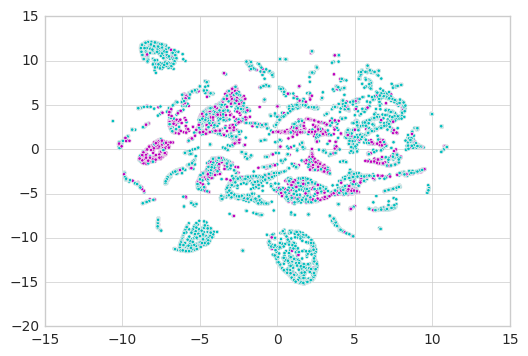

In [20]:
pca = PCA(n_components=8)
pca_results = pca.fit_transform(hidden_reps)
tsne_model = TSNE(n_components=2, random_state=0)
tsne_results = tsne_model.fit_transform(pca_results) 
dim_0 = np.reshape(tsne_results[:,0], tsne_results.shape[0])
dim_1 = np.reshape(tsne_results[:,1], tsne_results.shape[0])
plt.scatter(dim_0, dim_1, c=y_test_colors, s=6)

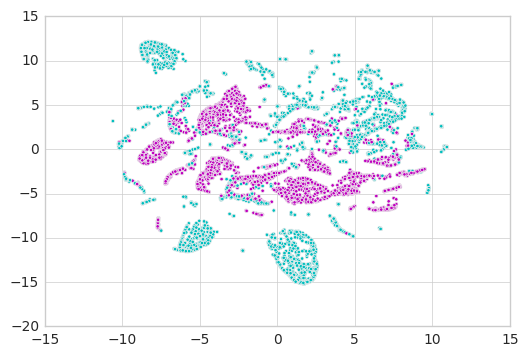

In [34]:
dim_0 = np.reshape(tsne_results[:,0], tsne_results.shape[0])
dim_1 = np.reshape(tsne_results[:,1], tsne_results.shape[0])
plt.scatter(dim_0, dim_1, c=pred_test_colors, s=6)

In [23]:
x, y, student_ids = load_data_will_student_solve_next_problem(hoc_num, minlen=minlen, y_is_seq=False, return_student_ids=True)
x_train, x_test, y_train, y_test, student_ids_train, student_ids_test = train_test_split(x, y, student_ids, test_size=0.1, random_state=42)

Loading data...
Data loaded.


In [24]:
model_id = "predict_next_prob_binary_two_layer_traj_len_{}".format(traj_len)

graph_to_use = tf.Graph()
with graph_to_use.as_default():
    saved_model = load_model(model_id, load_checkpoint=True, is_training=False, get_hidden_rep=True, timesteps=10)
    pred_train =np.argmax(saved_model.predict(x_train), axis=1)
    pred_test_probs = saved_model.predict(x_test)
    pred_test = np.argmax(pred_test_probs, axis=1)
    train_acc = accuracy_score(pred_train, np.argmax(y_train, axis=1))
    test_acc = accuracy_score(pred_test,  np.argmax(y_test, axis=1))
    print ("Train acc: {}\t Test acc: {}".format(train_acc, test_acc))

Loading model...


../tensorboard_logs/predict_next_prob_binary_two_layer_traj_len_6/
../checkpoints/predict_next_prob_binary_two_layer_traj_len_6/
../best_checkpoints/predict_next_prob_binary_two_layer_traj_len_6/
../checkpoints/predict_next_prob_binary_two_layer_traj_len_6/-544
Checkpoint loaded.
Model loaded.
Train acc: 0.545785359918	 Test acc: 0.5500210615


In [30]:
pred_test = np.argmax(pred_test_probs, axis=1)

In [31]:
print pred_test.shape

(9496,)
